In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
import os

In [5]:
data = pd.read_pickle("./resized_data_128.pkl")
x, y = data["x"], data["y"]
x.shape, y.shape

((8151, 3, 128, 128), (8151,))

In [ ]:
x = x.reshape(len(x), 3, -1)

## color histgram

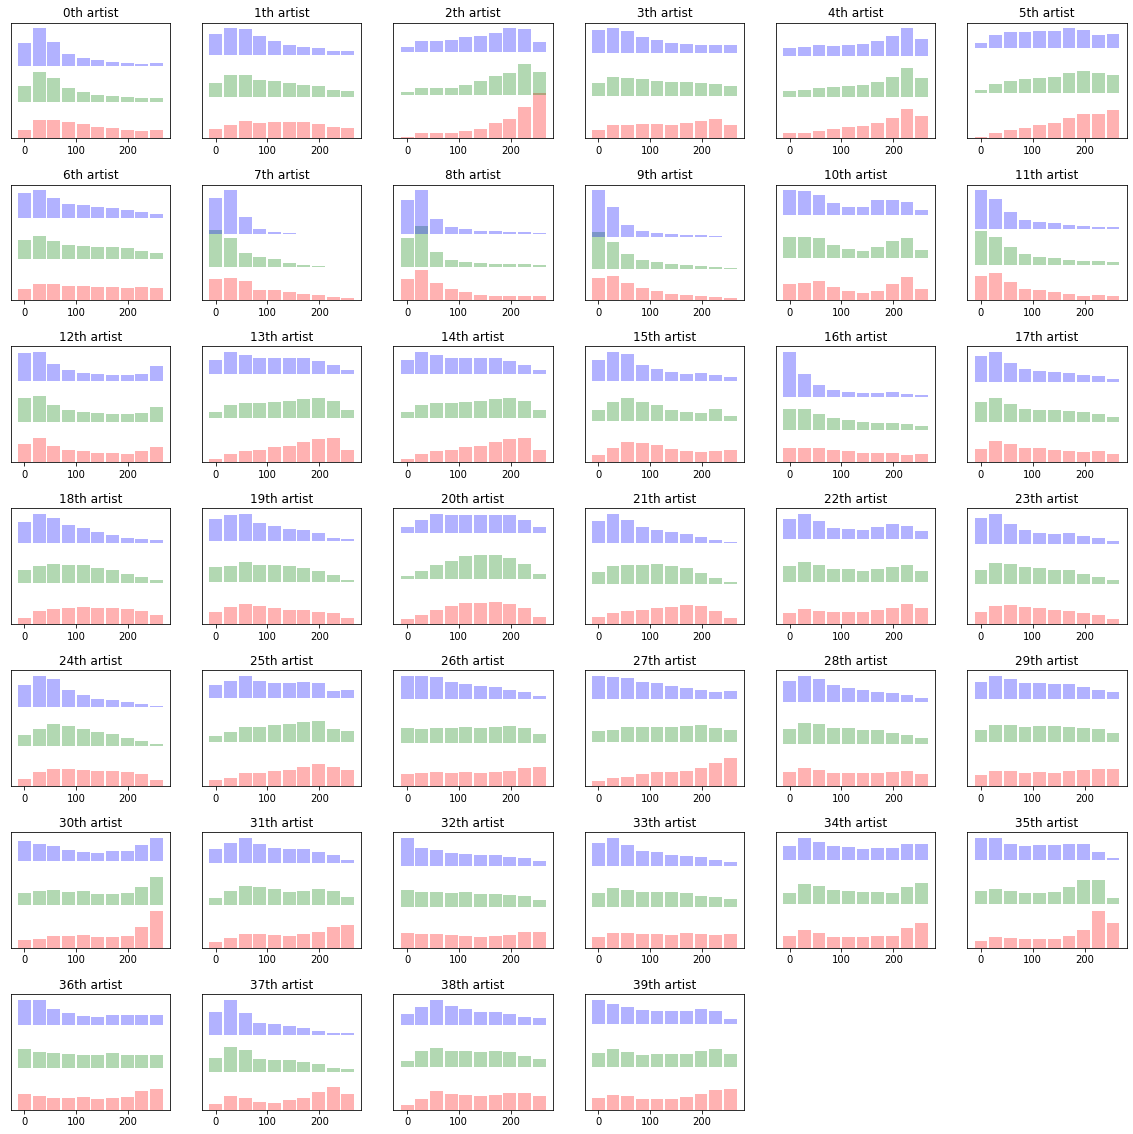

In [82]:
color_hists = []

for k in tqdm_notebook(range(40)):
    r = x[y == k][:,0].flatten()
    g = x[y == k][:,1].flatten()
    b = x[y == k][:,2].flatten()

    r_hist = np.histogram(r, range = [0, 255])[0]/len(r)
    g_hist = np.histogram(g, range = [0, 255])[0]/len(g)
    b_hist = np.histogram(b, range = [0, 255])[0]/len(b)
    color_hists.append({"r" : r_hist, "g" : g_hist, "b" : b_hist})

## color histgram of woks of each artist
plt.figure(figsize=(20,20))
for k in range(40):
    plt.subplot(7,6,k+1)
    r_hist, g_hist, b_hist = color_hists[k]["r"], color_hists[k]["g"], color_hists[k]["b"]
    plt.bar(np.linspace(0, 255, len(r_hist)), r_hist , bottom= 0, width = 25, alpha = 0.3, color = "r")
    plt.bar(np.linspace(0, 255, len(g_hist)), g_hist, bottom= 0.3, width = 25, alpha = 0.3, color = "g")
    plt.bar(np.linspace(0, 255, len(b_hist)), b_hist, bottom= 0.6, width = 25, alpha = 0.3, color = "b")
    plt.yticks([])
    plt.title("{}th artist".format(k))
    plt.subplots_adjust(hspace=0.4)

## color average across works and position

In [77]:
color_average_rec = []
for k in tqdm_notebook(range(40)):
    c = np.mean(x, axis = 2)
    c_ave = np.mean(c[y == k], axis = 0)
    color_average_rec.append(c_ave)

color_average_rec = np.array(color_average_rec)

Text(0, 0.5, 'color value average')

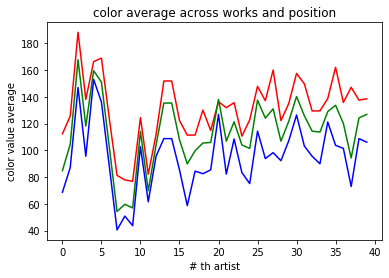

In [78]:
plt.plot(color_average_rec[:,0], "r")
plt.plot(color_average_rec[:,1], "g")
plt.plot(color_average_rec[:,2], "b")
plt.title("color average across works and position")
plt.xlabel("# th artist")
plt.ylabel("color value average")